### Clase 8: Regresión

In [1]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          mic.xlsx


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.corr() #Tabla de correlación

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [16]:
x = df['Height']
y = df['Weight']

x = x.to_frame() #cambiar los datos de series a frame para trabajar con ellos
y = y.to_frame()

In [17]:
#pip install statsmodels

In [18]:
#pip install sklearn

In [19]:
import statsmodels.api as sm
from sklearn import linear_model

In [20]:
lm = linear_model.LinearRegression()
lm

LinearRegression()

In [24]:
model_lm = lm.fit(y,x)

In [27]:
print('El intercepto es \t:', model_lm.intercept_)
print('Los coeficientes son \t:', model_lm.coef_)
print('El valor de R2 es \t:', model_lm.score(y,x))

El intercepto es 	: [48.47790261]
Los coeficientes son 	: [[0.11081279]]
El valor de R2 es 	: 0.8551742120609958


In [28]:
model_ols = sm.OLS.from_formula('x~y', data = df) 
result = model_ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:41:46   Log-Likelihood:                -18002.
No. Observations:               10000   AIC:                         3.601e+04
Df Residuals:                    9998   BIC:                         3.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4779      0.075    645.773      0.000      48.331      48.625
y              0.1108      0.000    242.975      0.000       0.110       0.112
==============================================================================
Omnibus:                        4.617   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.615
Skew:                          -0.053   Prob(JB):                       0.0995
Kurtosis:                       3.000   Cond. No.                         844.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
numeros = ([200, 201, 94])
numeros = pd.DataFrame(numeros)

y = model_lm.predict(numeros) #Height = b0 + b1*Weight;
y = pd.DataFrame(y)
y

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,0
0,70.640462
1,70.751274
2,58.894305


In [32]:
#pip install seaborn

In [33]:
import seaborn as sns

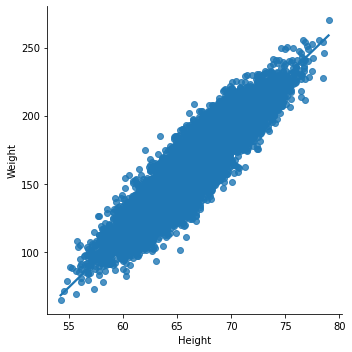

In [35]:
sns.lmplot(x = 'Height', y = 'Weight', data = df)

In [46]:
import matplotlib as plt
from matplotlib import pyplot as plt

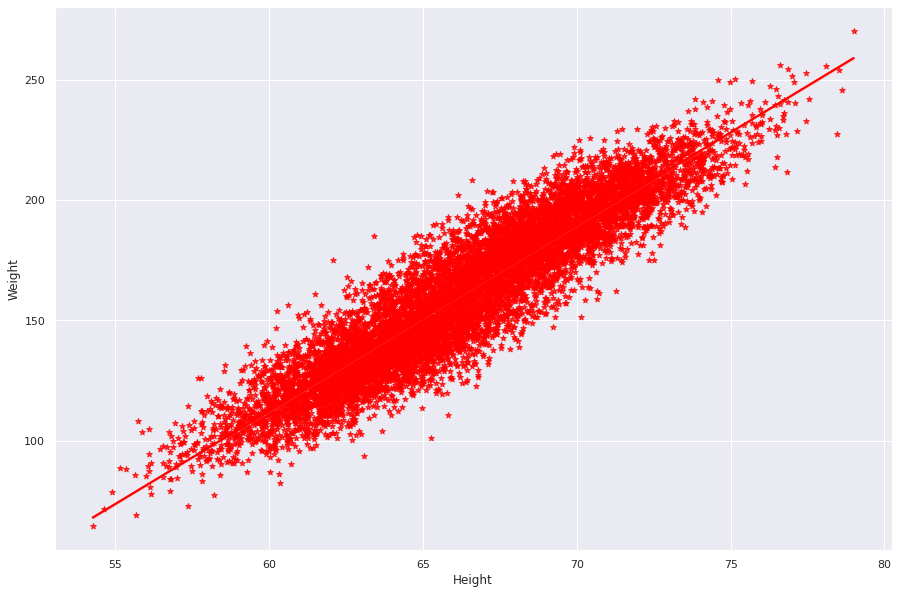

In [47]:
#plt.figure(figsize = (15,10)
sns.regplot(x = 'Height',
            y = 'Weight',
            data = df,
            color = 'red',
            marker = '*')
sns.set(rc={'figure.figsize':(15,10)}) #este usa params, checar para otros aspectos